In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

adult_salary_df = pd.read_csv(
    "https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Adult%20Salary.csv",
)

In [2]:
# Вывожу часть таблицы чтобы посмотреть какие есть колонки
adult_salary_df.head()

,Age,Gender,WorkingClass,Education,MaritalStatus,Occupation,Relationship,Race,NativeCountry,Income
0,25,Male,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,United-States,<=50K
1,38,Male,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,United-States,<=50K
2,28,Male,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,United-States,>50K
3,44,Male,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,United-States,>50K
4,18,Female,?,Some-college,Never-married,?,Own-child,White,United-States,<=50K


In [3]:
# Проверяю что в таблице заполнены все значения
adult_salary_df.isna().sum()

Age              0
Gender           0
WorkingClass     0
Education        0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
NativeCountry    0
Income           0
dtype: int64

In [4]:
# Заметил что в датасете есть "?" и решил их удалить
print((adult_salary_df == "?").sum())
adult_salary_df = adult_salary_df[adult_salary_df != "?"]

Age                 0
Gender              0
WorkingClass     2799
Education           0
MaritalStatus       0
Occupation       2809
Relationship        0
Race                0
NativeCountry     857
Income              0
dtype: int64


#### Постройте столбчатую диаграмму

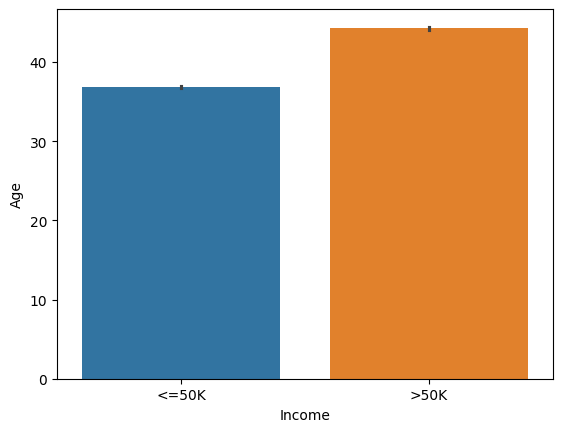

In [5]:
sns.barplot(data=adult_salary_df, x="Income", y="Age", hue="Income")
plt.show()

На данном графике можно увидеть что люди с заработком ниже 50 тыс. долларов имеют ниже средний возраст, чем те кто зарабатывает больше 50 тыс. С возрастом люди чаще зарабатывают больше 50 тыс. долларов.

#### Постройте гистограмму с распределением числовой переменной

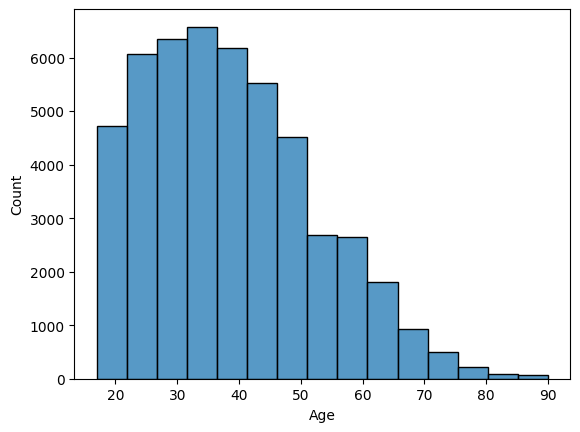

In [6]:
sns.histplot(data=adult_salary_df, x="Age", bins=15)
plt.show()

На данном распределении заметно, что в датасете преобладают молодые люди, а с увеличением возраста количество наблюдений постепенно снижается. Это выглядит логично и можно предположить, что численность работоспособного населения уменьшается с возрастом. Также можно отметить рост числа наблюдений к возрасту около 35 лет.

#### Постройте точечную диаграмму для двух числовых переменных

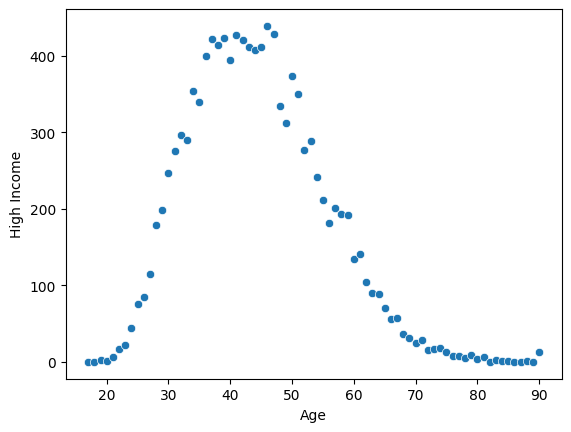

In [7]:
adult_salary_df["High Income"] = (adult_salary_df["Income"] == ">50K").astype(int)
grouped_dataset = adult_salary_df.groupby("Age")["High Income"].sum()
sns.scatterplot(data=grouped_dataset)
plt.show()

На данном графике видим нормальное распределение зависимости количества людей получающих ЗП больше 50 тыс. долларов от возраста. Наиболее высокооплачиваемые люди около 40 лет и с возрастом количество таких людей падает. Также количество высокооплачиваемых людей юного возраста достаточно низкое. Чем ниже рассматриваемый возраст, тем меньше людей получающих ЗП больше 50 тыс. долларов.

#### Постройте тепловую карту для двух категориальных переменных

In [8]:
# Подготавливаем данные для heatmap. Считаем для каждого рода деятельности и пола
# какой процент человек зарабатывает больше 50 тысяч долларов


adult_salary_df["High Income"] = (adult_salary_df["Income"] == ">50K").astype(int)
adult_salary_df_pivot = adult_salary_df.pivot_table(
    index="WorkingClass",
    columns="Gender",
    values="High Income",
    aggfunc="mean",
    fill_value=0,
)

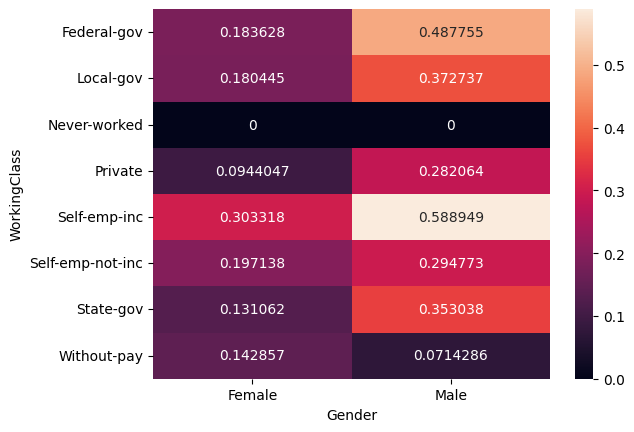

In [9]:
sns.heatmap(adult_salary_df_pivot, annot=True, fmt="g")
plt.show()

На данном графике можно отметить несколько закономерностей:
* Доля женщин с доходом выше 50 тыс. долларов заметно ниже по сравнению с мужчинами, причём это различие сохраняется в независимости от рода деятельности.
* Чаще всего люди имеющие собственный бизнес (Self-emp-inc), получают больше 50 тыс. долларов. Причем среди мужчин доля почти достигает 59%.
* Самозанятые (Self-emp-not-inc) женщины чаще достигают ЗП выше 50 тыс. долларов, чем работая в частной компании и гос. учреждениях. Доля мужчин работающих в частной компании и самозанятых почти не отличается между этими родами деятельности.
* Сотрудники правительственных организаций (State-gov, Federal-gov, Local-gov) чаще зарабатывают ЗП больше 50 тысяч в год, чем сотрудники частных компаний. А также мужчины которые работают в гос. органах чаще зарабатывают ЗП больше чем 50 тыс. долларов в год чем самозанятые.
* Соотношение женщин с доходом более 50 тыс. долларов и которые работают без оплаты (Without Pay) в 2 раза выше чем соотношение мужчин. (Можно предположить что больше женщин имеют больше времени заниматься волонтерской деятельностью?)